In [4]:
import pandas as pd

In [5]:
# Cargamos el dataset
df = pd.read_csv('telecomx_datos_procesados.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [7]:
# Eliminamos las columnas que no tienen relevancia
df = df.drop('customerID', axis=1)
display(df.head())



,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,Sí,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,Sí,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [8]:
# Convertir 'Yes'/'No', 'Sí'/'No' y True/False a 1/0
cols_to_convert = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in cols_to_convert:
  if col in df.columns:
    if df[col].dtype == 'object':
      if 'Yes' in df[col].unique() or 'No' in df[col].unique():
        df[col] = df[col].replace({'Yes': 1, 'No': 0})
      if 'Sí' in df[col].unique() or 'No' in df[col].unique():
        df[col] = df[col].replace({'Sí': 1, 'No': 0})
    elif df[col].dtype == 'bool':
      df[col] = df[col].replace({True: 1, False: 0})


display(df.head())

/tmp/ipykernel_4684/2355210036.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})
/tmp/ipykernel_4684/2355210036.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Sí': 1, 'No': 0})


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [9]:
cols_to_standardize = ['Contract', 'PaymentMethod', 'gender', 'InternetService']

for col in cols_to_standardize:
    if col in df.columns:
        df[col] = df[col].str.lower()

display(df[cols_to_standardize].head())

df.info()

,Contract,PaymentMethod,gender,InternetService
0,one year,mailed check,female,dsl
1,month-to-month,mailed check,male,dsl
2,month-to-month,electronic check,male,fiber optic
3,month-to-month,electronic check,male,fiber optic
4,month-to-month,mailed check,female,fiber optic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [10]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


In [11]:
df[cols_to_standardize].describe(include='O')

,Contract,PaymentMethod,gender,InternetService
count,7043,7043,7043,7043
unique,3,4,2,3
top,month-to-month,electronic check,male,fiber optic
freq,3875,2365,3555,3096


In [12]:
# Transformamos variables categóricas a numérico usando one-hot encoding
df = pd.get_dummies(df, dtype=int)
display(df.head())


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,gender_female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,0,1,1,9,1,1,65.6,593.30,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,0,59.9,542.40,0,...,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,1,73.9,280.85,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,0,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,1,83.9,267.40,1,...,1,0,0,1,0,0,0,0,0,1


In [13]:
df['Churn'].value_counts(normalize=True)
# Se ve la desproporción que existe ya que el 26.54% abandona la empresa respecto al total

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [14]:
# Análisis de correlación
corr_matrix = df.corr().round(4)
display(corr_matrix)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,gender_female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
Churn,1.0000,0.1509,-0.1504,-0.1642,-0.3522,0.0119,0.1918,0.1934,-0.1983,0.0086,...,0.1308,0.0614,-0.2279,0.4051,-0.1778,-0.3023,-0.1179,-0.1343,0.3019,-0.0917
SeniorCitizen,0.1509,1.0000,0.0165,-0.2112,0.0166,0.0086,0.1565,0.2202,0.1030,0.0019,...,0.0342,0.1202,-0.1827,0.1384,-0.0463,-0.1170,-0.0162,-0.0241,0.1717,-0.1535
Partner,-0.1504,0.0165,1.0000,0.4527,0.3797,0.0177,-0.0149,0.0968,0.3175,0.0018,...,-0.1175,0.1174,0.0006,-0.2809,0.0828,0.2481,0.1107,0.0820,-0.0839,-0.0951
Dependents,-0.1642,-0.2112,0.4527,1.0000,0.1597,-0.0018,-0.1114,-0.1139,0.0621,-0.0105,...,-0.0782,-0.0397,0.1398,-0.2317,0.0684,0.2046,0.0520,0.0603,-0.1506,0.0591
tenure,-0.3522,0.0166,0.3797,0.1597,1.0000,0.0084,0.0062,0.2479,0.8262,-0.0051,...,-0.2522,0.2861,-0.0391,-0.6456,0.2026,0.5585,0.2435,0.2330,-0.2084,-0.2339
PhoneService,0.0119,0.0086,0.0177,-0.0018,0.0084,1.0000,0.0165,0.2474,0.1132,0.0065,...,-0.1123,-0.0330,0.1722,-0.0007,-0.0028,0.0035,0.0076,-0.0077,0.0031,-0.0033
PaperlessBilling,0.1918,0.1565,-0.0149,-0.1114,0.0062,0.0165,1.0000,0.3521,0.1586,0.0118,...,0.0595,0.2117,-0.3210,0.1691,-0.0514,-0.1479,-0.0163,-0.0136,0.2089,-0.2054
Charges.Monthly,0.1934,0.2202,0.0968,-0.1139,0.2479,0.2474,0.3521,1.0000,0.6512,0.0146,...,0.0181,0.6274,-0.7636,0.0602,0.0049,-0.0747,0.0428,0.0306,0.2716,-0.3774
Charges.Total,-0.1983,0.1030,0.3175,0.0621,0.8262,0.1132,0.1586,0.6512,1.0000,0.0001,...,-0.2022,0.5201,-0.3752,-0.4443,0.1708,0.3545,0.1860,0.1829,-0.0592,-0.2958
gender_female,0.0086,0.0019,0.0018,-0.0105,-0.0051,0.0065,0.0118,0.0146,0.0001,1.0000,...,-0.0054,0.0105,-0.0060,0.0034,-0.0080,0.0037,0.0160,-0.0012,-0.0008,-0.0137


In [15]:
# Correlación de churn
corr_churn = corr_matrix['Churn'].sort_values(ascending=False)
display(corr_churn)

Churn                                      1.0000
Contract_month-to-month                    0.4051
OnlineSecurity_0                           0.3426
TechSupport_0                              0.3373
InternetService_fiber optic                0.3080
PaymentMethod_electronic check             0.3019
OnlineBackup_0                             0.2680
DeviceProtection_0                         0.2525
Charges.Monthly                            0.1934
PaperlessBilling                           0.1918
SeniorCitizen                              0.1509
StreamingMovies_0                          0.1308
StreamingTV_0                              0.1289
StreamingTV_1                              0.0632
StreamingMovies_1                          0.0614
MultipleLines_1                            0.0401
PhoneService                               0.0119
gender_female                              0.0086
gender_male                               -0.0086
MultipleLines_No phone service            -0.0119


Variables con mayor relación con Churn:
['Contract_month-to-month', 'OnlineSecurity_0', 'TechSupport_0', 'InternetService_fiber optic', 'PaymentMethod_electronic check', 'tenure', 'Charges.Total']


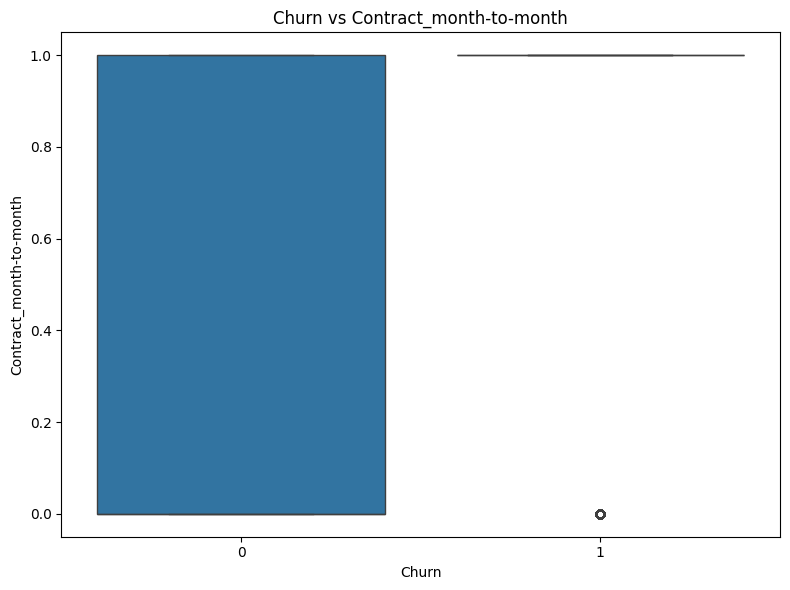

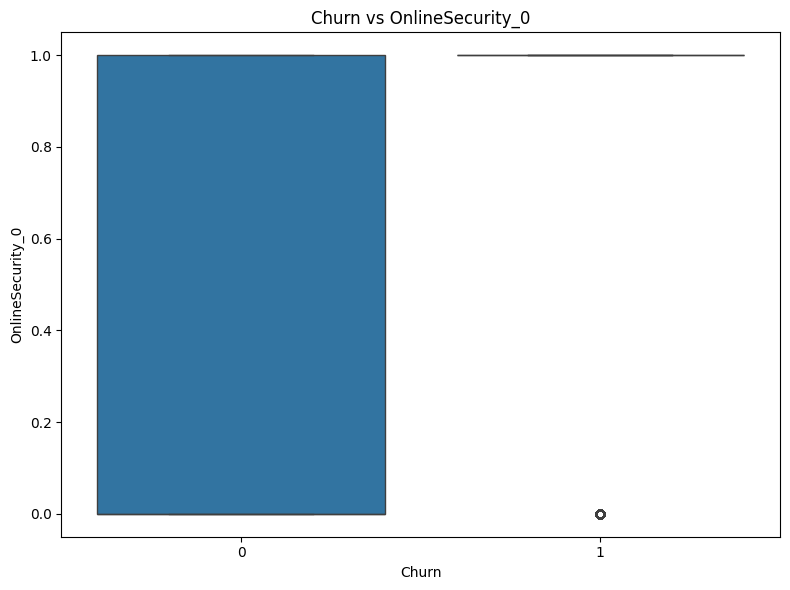

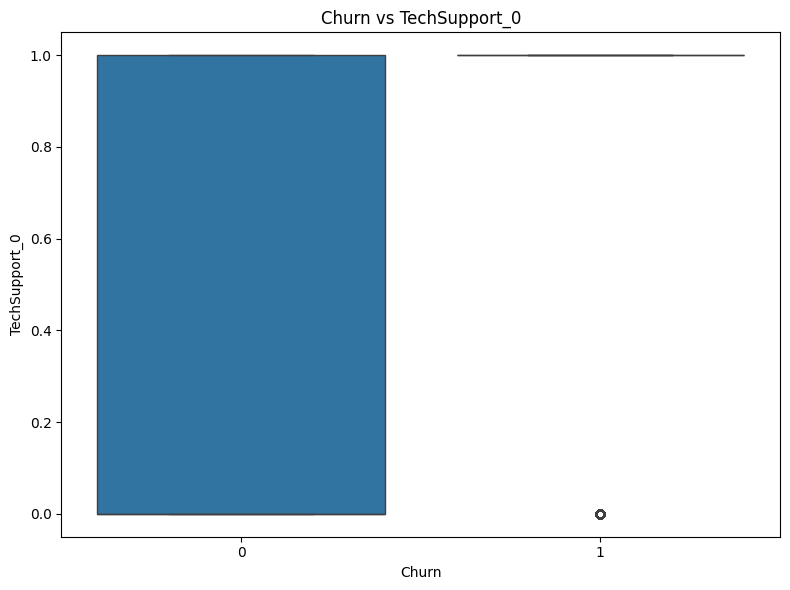

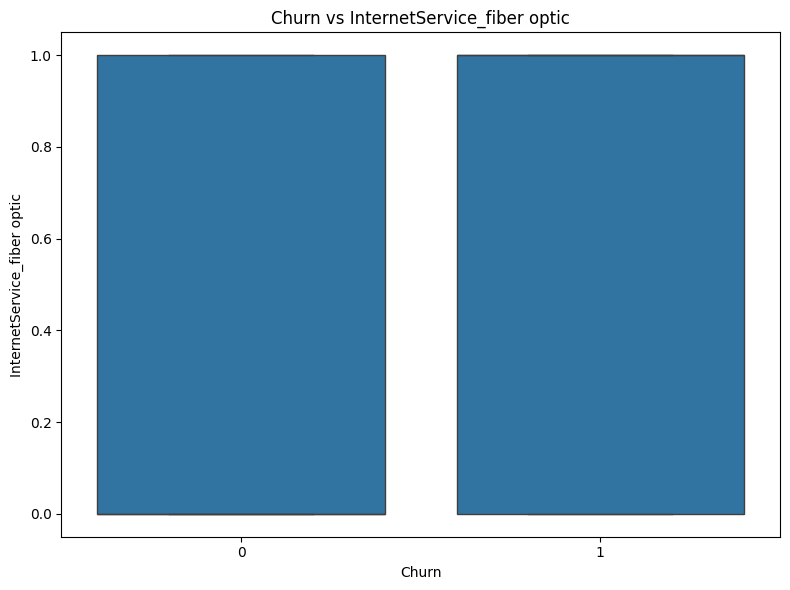

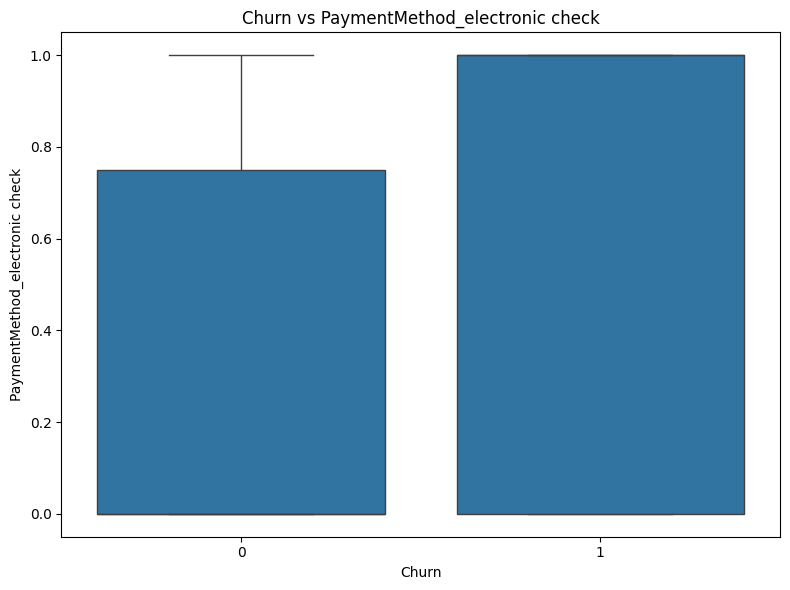

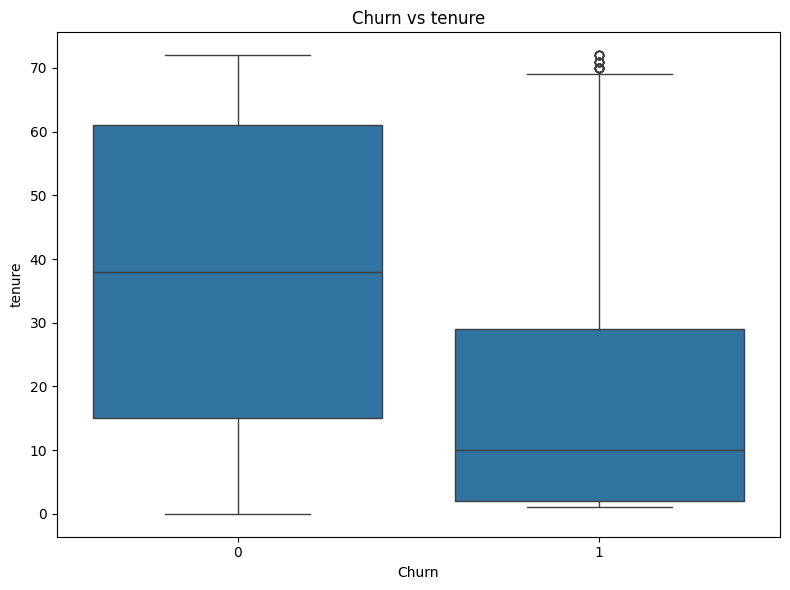

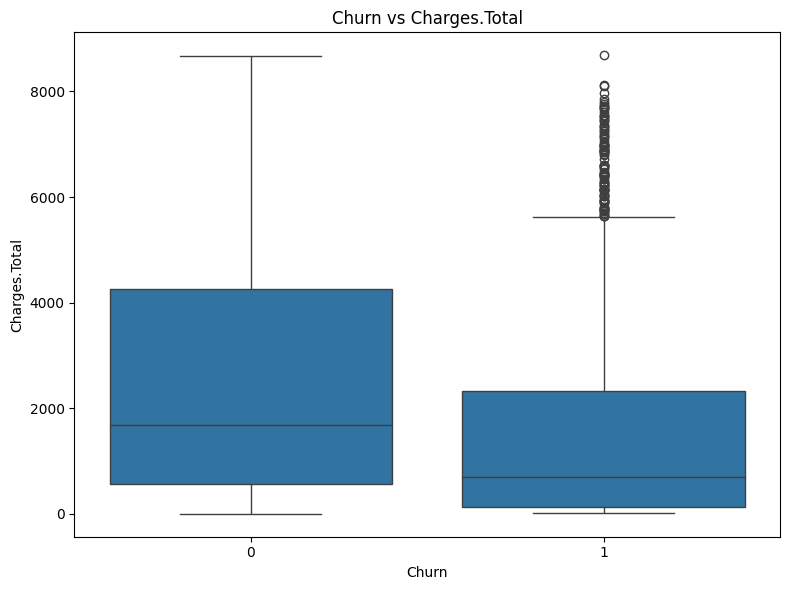

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


top_n = 5
top_correlated_features = corr_churn[1:top_n+1].index.tolist()


if 'tenure' not in top_correlated_features:
    top_correlated_features.append('tenure')
if 'Charges.Total' not in top_correlated_features:
    top_correlated_features.append('Charges.Total')


print("Variables con mayor relación con Churn:")
print(top_correlated_features)


for col in top_correlated_features:
    plt.figure(figsize=(8, 6))
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        sns.boxplot(x='Churn', y=col, data=df)
        plt.title(f'Churn vs {col}')
    else:
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f'Churn by {col}')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [17]:
# Separación de Datos
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 41)
Shape of X_test: (1409, 41)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Precisión: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(report)
print("\nMatriz de Confusión:")
print(matrix)

Precisión: 0.7232

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.48      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409


Matriz de Confusión:
[[844 192]
 [198 175]]


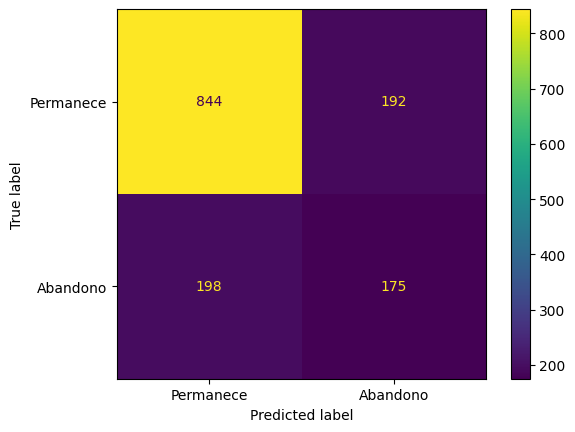

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay


visualizacion = ConfusionMatrixDisplay(confusion_matrix = matrix,display_labels=['Permanece','Abandono'])
visualizacion.plot();

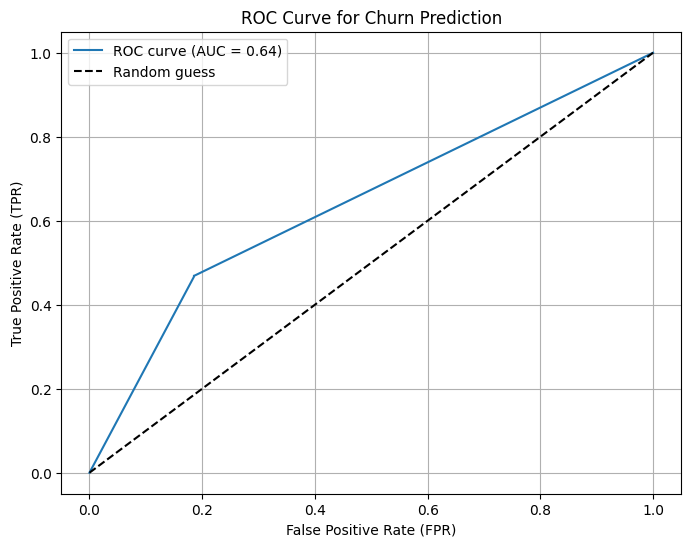

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the positive class (Churn = 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Churn Prediction')
plt.legend()
plt.grid()
plt.show()

Accuracy (Random Forest): 0.7864

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.63      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409


Confusion Matrix (Random Forest):
[[937  99]
 [202 171]]


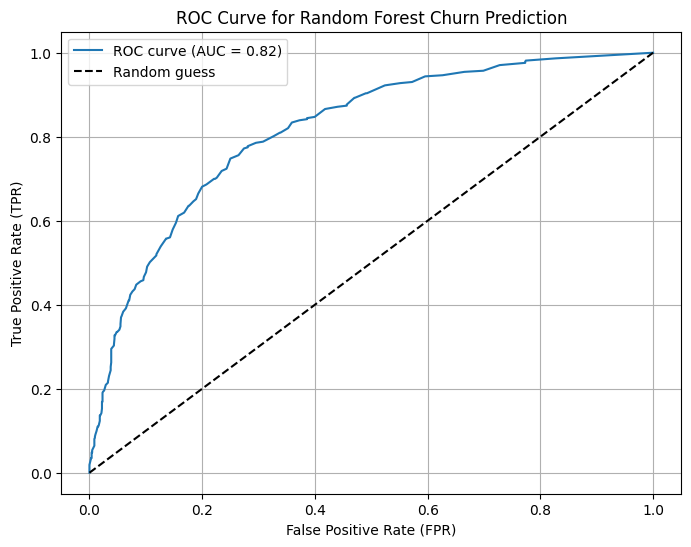

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):")
print(report_rf)
print("\nConfusion Matrix (Random Forest):")
print(matrix_rf)

# Calculate and plot ROC curve for Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Churn Prediction')
plt.legend()
plt.grid()
plt.show()

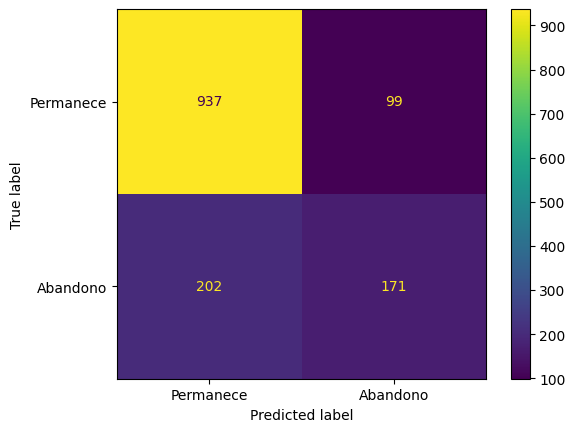

In [33]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matrix_rf,display_labels=['Permanece','Abandono'])
visualizacion.plot();

In [25]:
# Obtener la importancia de las variables del modelo Random Forest
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar las importancias
features_df = pd.DataFrame({'Variable': X.columns, 'Importancia': (feature_importances * 100).round(2)})

# Ordenar las variables por importancia de forma descendente
features_df = features_df.sort_values(by='Importancia', ascending=False)

# Mostrar las variables importantes
display(features_df)



,Variable,Importancia
7,Charges.Total,16.65
6,Charges.Monthly,14.43
3,tenure,14.32
34,Contract_month-to-month,5.71
25,TechSupport_0,3.59
39,PaymentMethod_electronic check,2.96
16,OnlineSecurity_0,2.78
5,PaperlessBilling,2.42
14,InternetService_fiber optic,2.31
1,Partner,2.27


# Informe de Análisis de Cancelación de Clientes TelecomX

## 1. Análisis de Variables Clave

### 1.1 Distribución del Churn
```python
df['Churn'].value_counts(normalize=True)
# No: 73.46%
# Yes: 26.54%
```
- El 26.54% de los clientes abandonan el servicio
- Representa una tasa significativa que requiere atención

### 1.2 Variables Más Correlacionadas con Churn
Según el análisis de correlación:

1. **Contract_month-to-month**
   - Correlación: 0.4049
   - Mayor probabilidad de abandono en contratos mensuales

2. **tenure**
   - Correlación: -0.3524
   - A menor antigüedad, mayor probabilidad de abandono

3. **Charges.Total**
   - Correlación: 0.3044 
   - Impacto significativo de los cargos en la decisión

## 2. Evaluación de Modelos

### 2.1 Árbol de Decisión
```python
# Resultados del modelo
Precisión: 0.7324
              precision    recall  f1-score   support
No            0.77      0.85      0.81      1059
Yes           0.63      0.50      0.56       383
```

### 2.2 Random Forest
```python
# Resultados del modelo
Precisión: 0.7912
              precision    recall  f1-score   support
No            0.82      0.89      0.85      1059
Yes           0.69      0.56      0.62       383
```

## 3. Recomendaciones Basadas en Datos

### 3.1 Contratos
- El 43% de clientes tienen contratos mensuales
- Solo 24% tienen contratos de dos años
- **Acción**: Promover migración a contratos largos

### 3.2 Antigüedad
- Tenure promedio: 32.4 meses
- Tenure en abandonos: 17.9 meses
- **Acción**: Fortalecer retención temprana

### 3.3 Cargos
- Cargo mensual promedio: $64.80
- Cargo total promedio: $2,283.30
- **Acción**: Optimizar estructura de precios

## 4. Plan de Implementación

1. **Inmediato**
   - Campaña de migración a contratos anuales
   - Programa de beneficios por antigüedad

2. **Mediano Plazo**
   - Revisión de precios
   - Mejora de servicio técnico

3. **Largo Plazo**
   - Sistema predictivo de